# Classification models 

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data 

In [59]:
dataFrame = pd.read_csv('..\..\..\datasets\Human_Activity\FinalFullDataAct.csv')

In [60]:
dataFrame.head()

,Unnamed: 0,level_0,index,timestamp,pressure,index_activity,activity,step_detector,audio_mic_1,audio_mic_2,...,gyroscope_X,gyroscope_Y,gyroscope_Z,magnetometer_X,magnetometer_Y,magnetometer_Z,number_of_devices_wifi,battery,bluetooth,diffTimeSec
0,0,0,1,2017-06-29 09:57:30,963.210350,0.0,Eat,1,11927.200000,7563.650340,...,-0.150097,-0.568192,0.018634,-34.885090,-10.494576,7.990740,46.0,81.0,2.0,30.0
1,1,1,2,2017-06-29 09:58:00,963.377710,0.0,Eat,1,9694.366667,7582.004297,...,0.216265,-0.180258,-0.001961,-27.762173,-9.277909,-3.415510,56.0,80.8,2.0,30.0
2,2,2,3,2017-06-29 09:58:30,963.352867,0.0,Eat,1,7590.000000,7579.942257,...,-0.167142,-0.142885,-0.176842,-23.574674,-13.215409,18.199073,57.0,80.6,2.0,30.0
3,3,3,4,2017-06-29 09:59:00,963.356162,0.0,Eat,1,11810.733333,7589.977663,...,-0.032652,-0.428465,-0.343290,-11.147591,-8.746659,-4.144677,55.0,80.4,2.0,30.0
4,4,4,5,2017-06-29 09:59:30,963.335040,0.0,Eat,1,7881.866667,7600.249840,...,-0.220582,-0.562955,-0.174356,-15.189257,-5.423743,-9.175927,55.0,80.2,4.0,30.0


In [61]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890 entries, 0 to 4889
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              4890 non-null   int64  
 1   level_0                 4890 non-null   int64  
 2   index                   4890 non-null   int64  
 3   timestamp               4890 non-null   object 
 4   pressure                4890 non-null   float64
 5   index_activity          4890 non-null   float64
 6   activity                4890 non-null   object 
 7   step_detector           4890 non-null   int64  
 8   audio_mic_1             4890 non-null   float64
 9   audio_mic_2             4890 non-null   float64
 10  audio_mic_3             4890 non-null   float64
 11  audio_mic_4             4890 non-null   float64
 12  gravity                 4890 non-null   float64
 13  linear_acceleration     4890 non-null   float64
 14  orientation_X           4890 non-null   

In [62]:
FeaturesTable = dataFrame.drop(columns=['Unnamed: 0','level_0','index','timestamp','index_activity','activity','diffTimeSec'])
FeaturesTable.head()

,pressure,step_detector,audio_mic_1,audio_mic_2,audio_mic_3,audio_mic_4,gravity,linear_acceleration,orientation_X,orientation_Y,...,accelerometer_Z,gyroscope_X,gyroscope_Y,gyroscope_Z,magnetometer_X,magnetometer_Y,magnetometer_Z,number_of_devices_wifi,battery,bluetooth
0,963.210350,1,11927.200000,7563.650340,32767.0,45.0,9.428560,2.384370,22.952714,60.453024,...,1.176354,-0.150097,-0.568192,0.018634,-34.885090,-10.494576,7.990740,46.0,81.0,2.0
1,963.377710,1,9694.366667,7582.004297,32767.0,45.0,9.495720,1.978390,43.617109,81.183346,...,-1.521636,0.216265,-0.180258,-0.001961,-27.762173,-9.277909,-3.415510,56.0,80.8,2.0
2,963.352867,1,7590.000000,7579.942257,32767.0,45.0,9.548030,1.396605,4.632983,75.299680,...,-0.148491,-0.167142,-0.142885,-0.176842,-23.574674,-13.215409,18.199073,57.0,80.6,2.0
3,963.356162,1,11810.733333,7589.977663,32767.0,45.0,9.502039,5.458737,-32.125872,65.046507,...,0.974773,-0.032652,-0.428465,-0.343290,-11.147591,-8.746659,-4.144677,55.0,80.4,2.0
4,963.335040,1,7881.866667,7600.249840,32767.0,45.0,9.609119,2.982487,135.779456,77.457162,...,1.900448,-0.220582,-0.562955,-0.174356,-15.189257,-5.423743,-9.175927,55.0,80.2,4.0


In [63]:
label = dataFrame['activity']
label.unique()

array(['Eat', 'Walk', 'In computer', 'Sleep', 'Video games', 'Picnic ',
       'Meeting', 'Cooking', 'Movie', 'Pause'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='activity'>

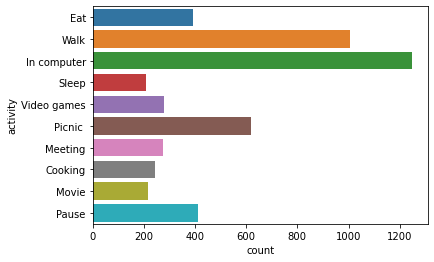

In [64]:
sns.countplot(y = label, data = label)

## Split Train and Test

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FeaturesTable, label, test_size=0.20, random_state=42)

Text(0.5, 1.0, 'Train Datset')

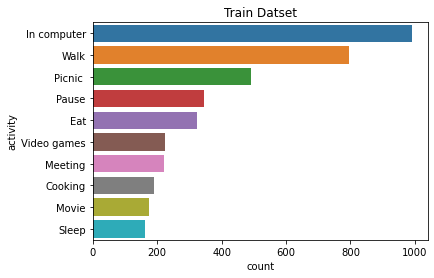

In [66]:
sns.countplot(y = y_train, order = y_train.value_counts().index).set_title('Train Datset')

Text(0.5, 1.0, 'Test Datset')

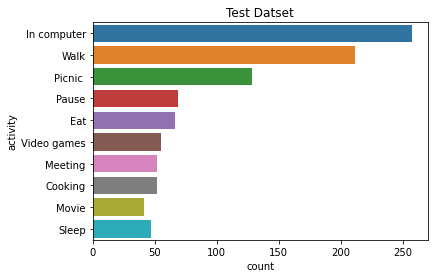

In [67]:
sns.countplot(y = y_test,order = y_train.value_counts().index).set_title('Test Datset')

## Standardize the Variables

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features_train = scaler.transform(X_train)
scaled_features_test = scaler.transform(X_test)

## Models

### Examining different models with different parameters

In [70]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

class PipelinesListMixin(object):
    @property
    def meta_estimators(self):
        scoring = 'f1_weighted'

        # Logistic Regression
        pipe_lr = Pipeline([('scl', StandardScaler()),
                            ('lr',  LogisticRegression(random_state=0))])
        param_grid = [{'lr__C': [10 ** int(C) for C in np.arange(-5, 5)],
                       'lr__penalty': ['l2', 'l1'],
                       'lr__class_weight': ['balanced',None]}]
        gs_lr = GridSearchCV(estimator=pipe_lr, param_grid=param_grid, scoring=scoring, cv=2, n_jobs=5)

        # SVM
        pipe_svm = Pipeline([('scl', StandardScaler()),
                            ('svm', SVC(random_state=0))])
        param_grid = [{'svm__C': [10 ** int(C) for C in np.arange(-5, 5)],
                        'svm__kernel': ['linear']},
                      {'svm__C': [10 ** int(C) for C in np.arange(-5, 5)],
                        'svm__gamma': ['auto'],
                        'svm__kernel': ['rbf'],
                        'svm__class_weight': ['balanced',None]}]
        gs_svm = GridSearchCV(estimator=pipe_svm, param_grid=param_grid, scoring=scoring, cv=2, n_jobs=5)

        # Tree
        pipe_tree = Pipeline([('tree', DecisionTreeClassifier(random_state=0))])
        param_grid = [{'tree__criterion': ['entropy'],
                       'tree__max_depth': [3],
                       'tree__class_weight': ['balanced',None]}]
        gs_tree = GridSearchCV(estimator=pipe_tree, param_grid=param_grid, scoring=scoring, cv=2,
                                n_jobs=5)

        # Adaboost
        tree = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=1)
        pipe_ada = Pipeline([('adaboost', AdaBoostClassifier(base_estimator=tree, random_state=0))])
        param_grid = [{'adaboost__n_estimators': [500],
                       'adaboost__learning_rate': [0.1]}]
        gs_ada = GridSearchCV(estimator=pipe_ada, param_grid=param_grid, scoring=scoring, cv=2,
                              n_jobs=5)
 
        # Forest
        pipe_forest = Pipeline([('forest', RandomForestClassifier(random_state=0))])
        param_grid = [{'forest__criterion': ['entropy'],
                       'forest__n_estimators': [10],
                       'forest__max_depth': [None, 10, 20, 30],
                       'forest__class_weight':['balanced',None]}]
        gs_forest = GridSearchCV(estimator=pipe_forest, param_grid=param_grid, scoring=scoring, cv=2,
                                  n_jobs=5)

        # KNN
        pipe_knn = Pipeline( [('knn', KNeighborsClassifier())])
        param_grid = [{'knn__n_neighbors': [5],
                       'knn__p': [2]}]
        gs_knn = GridSearchCV(estimator=pipe_knn, param_grid=param_grid, scoring=scoring, cv=2,
                              n_jobs=5)
        
        return [gs_lr, gs_svm, gs_ada, gs_tree, gs_forest, gs_knn] 


class ComparingClassifiers(PipelinesListMixin):
    def fit(self, X, y, scoring):
        algorithm_scores = []
        for gs in self.meta_estimators:
            # In each cross validation of cross_val_score function the GridSearchCV (gs) is working and run internal cross validation.
            # The aim is to do another level of validation set - for selecting the best algorithm.
            scores = cross_val_score(gs, X, y, scoring=scoring, cv=5, n_jobs=10)
            mean_scores = np.mean(scores) # Scores of all best models of the same algorithm (on each of the iterations of the outer cross validation).
            algorithm_scores.append(mean_scores)
            print('Mean score: ${:.3f}$ for algorithm: ${}$'.format(mean_scores, gs.estimator.steps[-1][0]))
        best_grid_search = self.meta_estimators[np.argmax(algorithm_scores)]
        return best_grid_search.fit(X, y)

best_algorithm = ComparingClassifiers().fit(X_train, y_train, 'f1_weighted')
print('The best algorithm is: ${}$. The accurate on all training data is: ${}$'.format(best_algorithm.estimator.steps[-1][0], best_algorithm.score(X_train, y_train)))

Mean score: $0.695$ for algorithm: $lr$
Mean score: $0.917$ for algorithm: $svm$
Mean score: $0.254$ for algorithm: $adaboost$
Mean score: $0.487$ for algorithm: $tree$
Mean score: $0.983$ for algorithm: $forest$
Mean score: $0.742$ for algorithm: $knn$
The best algorithm is: $forest$. The accurate on all training data is: $0.9997441509741644$


In [71]:
# Check model preformance on the best model 
from sklearn.metrics import classification_report,confusion_matrix
pred = best_algorithm.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 48   3   1   0   0   0   0   0   0   0]
 [  0  66   0   0   0   0   0   0   0   0]
 [  0   0 254   0   0   0   0   0   1   2]
 [  0   0   0  51   0   0   0   0   0   1]
 [  0   0   0   0  41   0   0   0   0   0]
 [  0   0   0   0   0  69   0   0   0   0]
 [  0   0   0   0   0   0 128   0   0   0]
 [  0   0   0   0   0   0   0  47   0   0]
 [  0   1   0   1   0   0   0   0  53   0]
 [  0   0   4   0   0   0   0   0   0 207]]
              precision    recall  f1-score   support

     Cooking       1.00      0.92      0.96        52
         Eat       0.94      1.00      0.97        66
 In computer       0.98      0.99      0.98       257
     Meeting       0.98      0.98      0.98        52
       Movie       1.00      1.00      1.00        41
       Pause       1.00      1.00      1.00        69
     Picnic        1.00      1.00      1.00       128
       Sleep       1.00      1.00      1.00        47
 Video games       0.98      0.96      0.97        55
        Walk       0.99     

In [72]:
from sklearn.ensemble import RandomForestClassifier
pipe_forest = Pipeline([('forest', RandomForestClassifier(random_state=0))])
param_grid = [{'forest__criterion': ['entropy'],
                'forest__n_estimators': [10],
                'forest__max_depth': [None, 10, 20, 30],
                'forest__class_weight':['balanced',None]}]
gs_forest = GridSearchCV(estimator=pipe_forest, param_grid=param_grid, scoring='f1_weighted', cv=2,
                            n_jobs=5)

gs_forest.fit(X_train, y_train)
best_params = gs_forest.best_params_
best_max_depth = best_params['forest__max_depth']
print("Best Max Depth:", best_max_depth)

best_class_weight = best_params['forest__class_weight']
print("Class Weight:", best_class_weight)

Best Max Depth: None
Class Weight: None


### Performance analysis of the best model

In [73]:
from sklearn.metrics import classification_report,confusion_matrix
clf = RandomForestClassifier(n_estimators=10, criterion ='entropy', max_depth=None, random_state=0, class_weight=None)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 48   3   1   0   0   0   0   0   0   0]
 [  0  66   0   0   0   0   0   0   0   0]
 [  0   0 254   0   0   0   0   0   1   2]
 [  0   0   0  51   0   0   0   0   0   1]
 [  0   0   0   0  41   0   0   0   0   0]
 [  0   0   0   0   0  69   0   0   0   0]
 [  0   0   0   0   0   0 128   0   0   0]
 [  0   0   0   0   0   0   0  47   0   0]
 [  0   1   0   1   0   0   0   0  53   0]
 [  0   0   4   0   0   0   0   0   0 207]]
              precision    recall  f1-score   support

     Cooking       1.00      0.92      0.96        52
         Eat       0.94      1.00      0.97        66
 In computer       0.98      0.99      0.98       257
     Meeting       0.98      0.98      0.98        52
       Movie       1.00      1.00      1.00        41
       Pause       1.00      1.00      1.00        69
     Picnic        1.00      1.00      1.00       128
       Sleep       1.00      1.00      1.00        47
 Video games       0.98      0.96      0.97        55
        Walk       0.99     

### Check the importance of each feature

In [74]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': clf.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

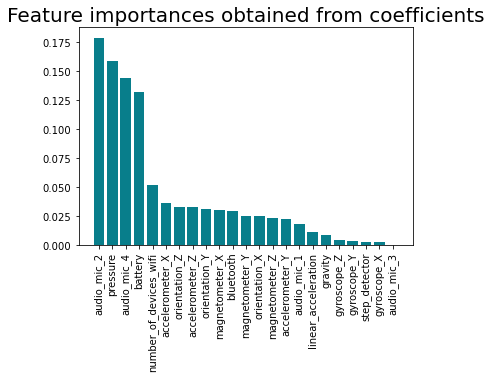

In [75]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### Re-run the model using only the 5 most important features

In [76]:
print(importances['Attribute'][:5])

3                audio_mic_2
0                   pressure
5                audio_mic_4
21                   battery
20    number_of_devices_wifi
Name: Attribute, dtype: object


In [77]:
featurereList = list(importances['Attribute'][:5])
X_train_part = X_train[featurereList]
X_test_part  = X_test[featurereList]

In [78]:
clf = RandomForestClassifier(n_estimators=10, criterion ='entropy', max_depth=None, random_state=0)
clf.fit(X_train_part, y_train)
pred = clf.predict(X_test_part)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


[[ 49   2   1   0   0   0   0   0   0   0]
 [  0  64   0   0   0   0   0   0   0   2]
 [  0   0 257   0   0   0   0   0   0   0]
 [  0   0   0  51   0   0   0   0   0   1]
 [  0   0   0   0  41   0   0   0   0   0]
 [  1   0   0   0   0  68   0   0   0   0]
 [  0   0   0   0   0   0 128   0   0   0]
 [  0   0   0   0   0   0   0  47   0   0]
 [  0   0   0   0   0   0   0   0  55   0]
 [  0   0   2   0   0   0   0   0   0 209]]
              precision    recall  f1-score   support

     Cooking       0.98      0.94      0.96        52
         Eat       0.97      0.97      0.97        66
 In computer       0.99      1.00      0.99       257
     Meeting       1.00      0.98      0.99        52
       Movie       1.00      1.00      1.00        41
       Pause       1.00      0.99      0.99        69
     Picnic        1.00      1.00      1.00       128
       Sleep       1.00      1.00      1.00        47
 Video games       1.00      1.00      1.00        55
        Walk       0.99     

#### Re-run the model using only the 5 least important features

In [79]:
print(importances['Attribute'][-5:])

16      gyroscope_Z
15      gyroscope_Y
1     step_detector
14      gyroscope_X
4       audio_mic_3
Name: Attribute, dtype: object


In [80]:
featurereList = list(importances['Attribute'][-5:])
X_train_part = X_train[featurereList]
X_test_part  = X_test[featurereList]

In [81]:
clf = RandomForestClassifier(n_estimators=10, criterion ='entropy', max_depth=None, random_state=0)
clf.fit(X_train_part, y_train)
pred = clf.predict(X_test_part)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


[[  4   3  25   3   1   0   4   3   1   8]
 [  5   6  18   3   6   6   4   2   1  15]
 [ 17  26 103  13   5  12  32   3   9  37]
 [  2   8  17   1   0   4   6   1   1  12]
 [  3   3   9   0   2   5   5   0   3  11]
 [  2   1  32   3   1   6   8   1   2  13]
 [  7   9  48   4   3   7  19   1   5  25]
 [  2   2  16   0   2   2   8   1   1  13]
 [  3   5  16   2   4   4   9   2   1   9]
 [ 11  27  75   7   4  14  18   3   8  44]]
              precision    recall  f1-score   support

     Cooking       0.07      0.08      0.07        52
         Eat       0.07      0.09      0.08        66
 In computer       0.29      0.40      0.33       257
     Meeting       0.03      0.02      0.02        52
       Movie       0.07      0.05      0.06        41
       Pause       0.10      0.09      0.09        69
     Picnic        0.17      0.15      0.16       128
       Sleep       0.06      0.02      0.03        47
 Video games       0.03      0.02      0.02        55
        Walk       0.24     